In [1]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.1 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.datasets import get_rdataset

import warnings
warnings.filterwarnings("ignore")

In [3]:
air = get_rdataset("AirPassengers").data

In [4]:
air.head()

,time,value
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [5]:
air.drop("time", axis=1, inplace=True)

In [14]:
air = air["value"]

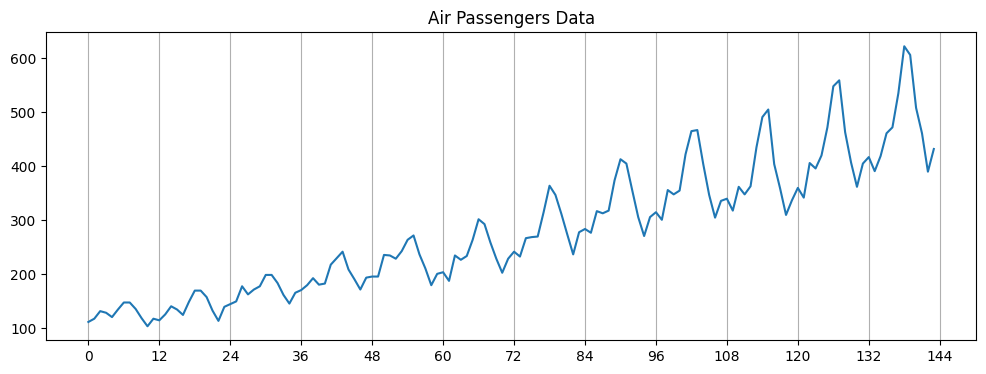

In [18]:
plt.figure(figsize=(12, 4))
plt.title("Air Passengers Data")
plt.plot(air)
plt.xticks(range(0, 145, 12))
plt.grid(axis="x")
plt.show()

In [19]:
# P = Regression of last n Values 
# D = Difference between last n values
# Q = Average of last n values 

# [1, 6, 2, 4, 6, 3, 8, 4, 6, 2, 4, 5, 6]
# For ex : P = 5, D = 3, Q = 4

# Regression of [1, 6, 2, 4, 6] 
# Difference of [2, 4, 6] 
# Average of [6, 2, 4, 6]

# Find the best values for p, d, q ----> best order

In [47]:
best_order = (5, 2, 2)

In [48]:
model = ARIMA(air, order = best_order)

In [49]:
result = model.fit()

In [50]:
months = 12

In [51]:
forecast = result.get_forecast(steps=months)

In [52]:
forecast.predicted_mean

144    500.695974
145    517.031362
146    538.286700
147    510.524138
148    497.558206
149    491.446653
150    496.270950
151    510.380911
152    518.035447
153    522.850679
154    522.137787
155    520.968315
Name: predicted_mean, dtype: float64

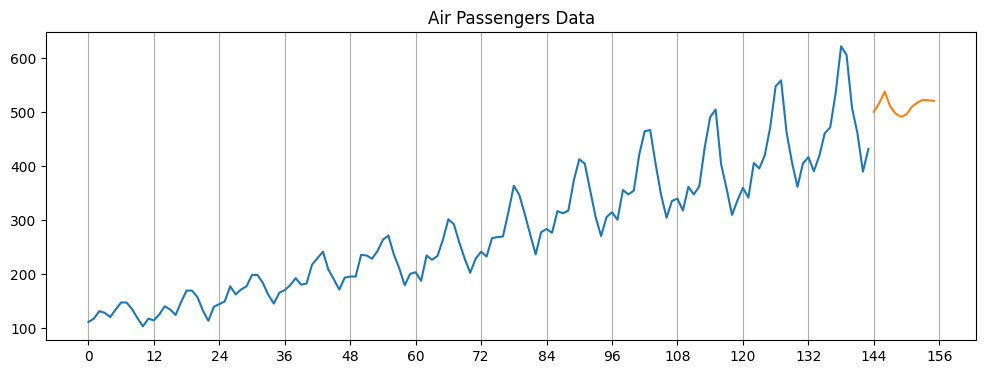

In [53]:
plt.figure(figsize=(12, 4))
plt.title("Air Passengers Data")
plt.plot(air)
plt.plot(np.arange(144, 156), forecast.predicted_mean)
plt.xticks(range(0, 157, 12))
plt.grid(axis="x")
plt.show()

In [54]:
result.aic

1382.509944223901

In [55]:
best_pdq = None
best_aic = np.inf

In [56]:
for p in range(8, 13):
    for d in range(2, 5):
        for q in range(2, 7):
            try:
                m = ARIMA(air, order=(p, d, q))
                re = m.fit()
                if re.aic < best_aic:
                    best_aic = re.aic
                    best_pdq = (p, d, q)
            except:
                print("Exception occured")
                continue

In [57]:
best_aic

1139.2729207530126

In [58]:
best_pdq

(11, 2, 3)

In [59]:
model = ARIMA(air, order=best_pdq)

In [60]:
result = model.fit()

In [61]:
forecast = result.get_forecast(steps=24)

In [70]:
np.round(forecast.predicted_mean)

144    449.0
145    420.0
146    450.0
147    491.0
148    511.0
149    567.0
150    656.0
151    635.0
152    548.0
153    494.0
154    434.0
155    466.0
156    487.0
157    455.0
158    479.0
159    524.0
160    548.0
161    602.0
162    688.0
163    667.0
164    585.0
165    529.0
166    477.0
167    502.0
Name: predicted_mean, dtype: float64

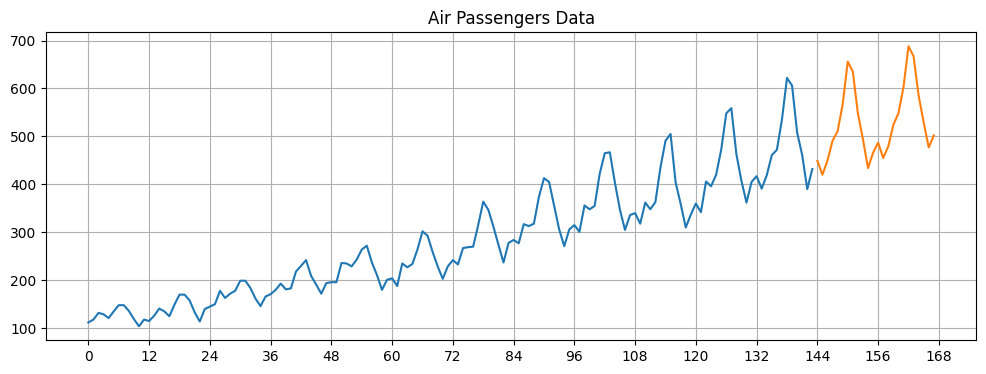

In [71]:
plt.figure(figsize=(12, 4))
plt.title("Air Passengers Data")
plt.plot(air)
plt.plot(np.arange(144, 168), np.round(forecast.predicted_mean))
plt.xticks(range(0, 169, 12))
plt.grid()
plt.show()